In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
def loadCSV(filename):
    '''
    function to load dataset
    '''
    dataset=pd.read_csv(filename)
    return np.array(dataset)

In [ ]:
def normalize(X):
    '''
    function to normalize feature matrix, X
    '''
    mins = np.min(X, axis = 0)
    maxs = np.max(X, axis = 0)
    rng = maxs - mins
    norm_X = 1 - ((maxs - X)/rng)
    return norm_X

In [ ]:
def logistic_func(teta, X):
    '''
    logistic(sigmoid) function

    '''
    return 1.0/(1 + np.exp(-np.dot(X, teta.T)))

In [ ]:
def log_gradient(teta, X, y):
    '''
    logistic gradient function
    [hθ(x)-y].x
    '''
    first_calc = logistic_func(teta, X) - y.reshape(X.shape[0], -1)
    final_calc = np.dot(first_calc.T, X)
    return final_calc

In [ ]:
def cost_func(teta, X, y):
    '''
    cost function, J
    J(θ)=y.log[hθ(x)]+(1-y).log[1-hθ(x)]
    '''
    log_func_v = logistic_func(teta, X)
    #print(y[0].shape)
    #y = np.squeeze(y) #y.shape değiştiriyor
    #print(y.shape)
    step1 = y * np.log(log_func_v)
    step2 = (1 - y) * np.log(1 - log_func_v)
    final = -step1 - step2
    return np.mean(final)


In [ ]:
def grad_desc(X, y, teta, lr=.01, converge_change=.001):
    '''
    gradient descent function
    '''

    cost = cost_func(teta, X, y)#maliyet fonksiyonu
    change_cost = 1
    num_iter = 1

    change_cost_list=[]

    #güncelleme
    while(change_cost > converge_change):
        old_cost = cost
        teta = teta - (lr * log_gradient(teta, X, y))
        cost = cost_func(teta, X, y)
        change_cost = old_cost - cost
        num_iter += 1
        change_cost_list +=[change_cost]
    return teta, num_iter,change_cost_list


In [ ]:
def pred_values(teta, X):
    '''
    function to predict labels
    '''
    pred_prob = logistic_func(teta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    return np.squeeze(pred_value) #yeniden boyutlandırma, reshape(-1,1) tersi

In [ ]:
def plot_reg(X, y, teta):
    '''
    function to plot decision boundary
    '''
    # labelled observations
    x_0 = X[np.where(y == 0.0)]
    x_1 = X[np.where(y == 1.0)]

    # plotting points with diff color for diff label
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0')
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1')

    # plotting decision boundary
    x1 = np.arange(0, 1, 0.1)
    x2 = -(teta[0,0] + teta[0,1]*x1)/teta[0,2]

    plt.plot(x1, x2, c='k', label='reg line')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

Estimated regression coefficients: [[-9.3671578  10.63702771 10.04113477]]
No. of iterations: 1545
Correctly predicted labels: 89


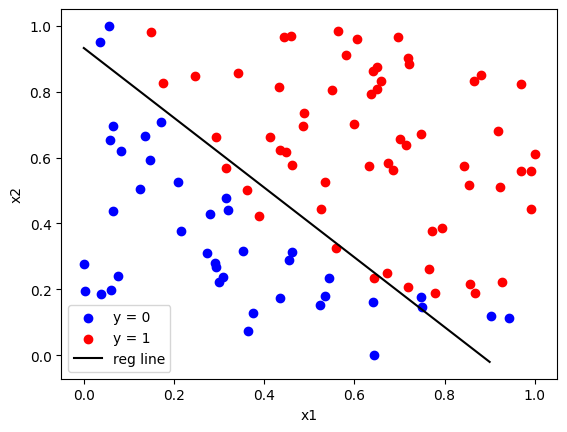

In [ ]:
if __name__ == "__main__":

    # load the dataset
    dataset = loadCSV('data.csv')

    # normalizing feature matrix
    X = normalize(dataset[:, :-1])
    #print(X)

    # stacking columns wth all ones in feature matrix
    X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) #bias eklenir

    # response vector
    y = dataset[:, -1]
    #print(y)

    # initial teta values
    teta = np.matrix(np.zeros(X.shape[1])) #ilk teta değerleri [0,0,0]

    # teta values after running gradient descent
    teta, num_iter,change_cost_list = grad_desc(X, y, teta)

    # estimated teta values and number of iterations
    print("Estimated regression coefficients:", teta)
    print("No. of iterations:", num_iter)

    # predicted labels
    y_pred = pred_values(teta, X)
    #print(X)
    # number of correctly predicted labels
    print("Correctly predicted labels:", np.sum(y == y_pred))

    # plotting regression line
    plot_reg(X, y, teta)

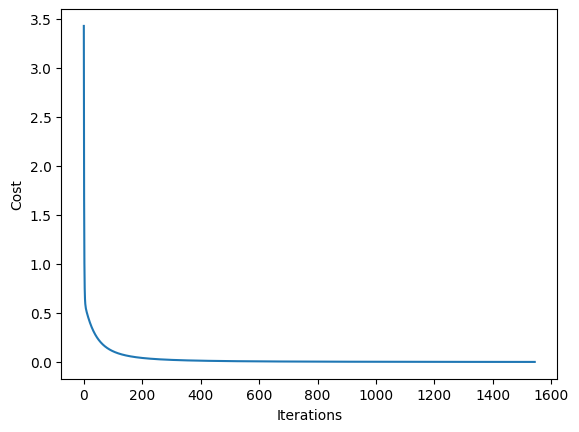

In [ ]:
plt.plot(range(len(change_cost_list)), change_cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()